Primeiras linhas do DataFrame:
        country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol  
0                           0.0  
1                           4.9  
2                           0.7  
3                          12.4  
4                           5.9  
Colunas do DataFrame: ['country', 'beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
Colunas do DataFrame após strip: ['country', 'beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
Mean Squared Error: 1.6634580613505499
R^2 Score: 0.9214663155689795


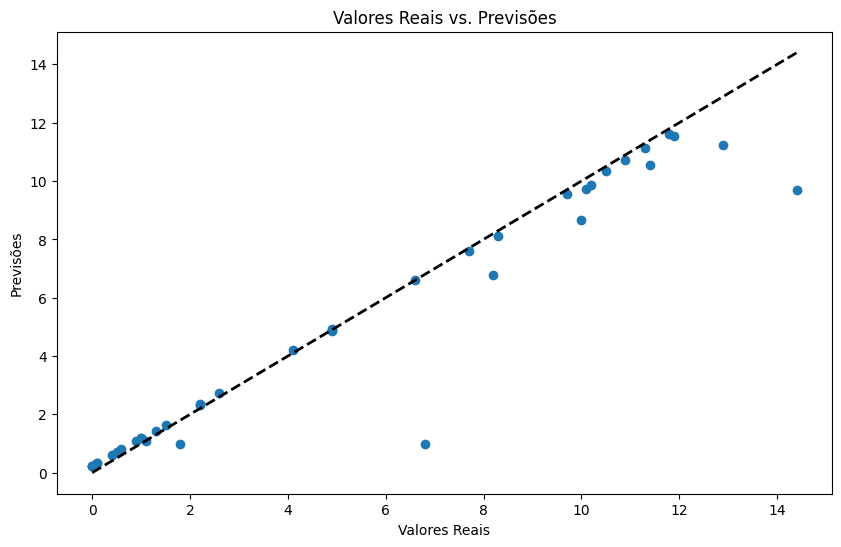

Características Selecionadas: ['country_Andorra' 'country_Argentina' 'country_Australia'
 'country_Botswana' 'country_Bulgaria' 'country_Burkina Faso'
 'country_Burundi' 'country_Cameroon' 'country_Canada' 'country_Chile'
 "country_Cote d'Ivoire" 'country_Croatia' 'country_Cyprus'
 'country_Denmark' 'country_Dominica' 'country_Estonia' 'country_France'
 'country_Gabon' 'country_Gambia' 'country_Guyana' 'country_Hungary'
 'country_Ireland' 'country_Japan' 'country_Laos' 'country_Latvia'
 'country_Luxembourg' 'country_Netherlands' 'country_New Zealand'
 'country_Nigeria' 'country_Portugal' 'country_Romania'
 'country_Russian Federation' 'country_Serbia' 'country_Sierra Leone'
 'country_Slovenia' 'country_South Korea' 'country_Spain'
 'country_Swaziland' 'country_Sweden' 'country_Tanzania' 'country_USA'
 'country_Uganda' 'country_Ukraine' 'country_United Kingdom'
 'country_Zimbabwe' 1 2 3]


In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

def load_and_preprocess_data(file_path, target_column):
    # Carregar os dados
    data = pd.read_csv(file_path)
    
    # Exibir as primeiras linhas do DataFrame para inspecionar os dados
    print("Primeiras linhas do DataFrame:\n", data.head())
    
    # Exibir as colunas do DataFrame para diagnóstico
    print("Colunas do DataFrame:", data.columns.tolist())
    
    # Remover espaços extras dos nomes das colunas
    data.columns = data.columns.str.strip()
    
    # Verificar novamente as colunas do DataFrame após remover espaços extras
    print("Colunas do DataFrame após strip:", data.columns.tolist())
    
    # Verificar se a coluna target existe no DataFrame
    if target_column not in data.columns:
        raise KeyError(f"'{target_column}' not found in the DataFrame columns.")
    
    # Separar as variáveis independentes (X) e a variável dependente (y)
    X = data.drop(columns=[target_column])  # Variáveis independentes
    y = data[target_column]  # Variável dependente
    
    # Identificar as colunas categóricas
    categorical_columns = X.select_dtypes(include=['object']).columns
    
    # Aplicar One-Hot Encoding às colunas categóricas
    column_transformer = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_columns)
        ],
        remainder='passthrough'
    )
    
    # Transformar X
    X = column_transformer.fit_transform(X)
    
    return X, y, column_transformer, categorical_columns

def build_and_train_model(X, y, test_size=0.2, alpha=1.0):
    # Dividir os dados em conjuntos de treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    # Criar o modelo de Regressão Ridge
    ridge = Ridge(alpha=alpha)
    
    # Seleção de características
    selector = SelectFromModel(estimator=ridge, threshold='mean')
    
    # Pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler(with_mean=False)),  # Normalizar os dados
        ('selector', selector),        # Seleção de características
        ('regressor', ridge)           # Modelo de regressão
    ])
    
    # Treinar o modelo
    pipeline.fit(X_train, y_train)
    
    # Fazer previsões
    y_pred = pipeline.predict(X_test)
    
    # Avaliar o modelo
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')
    
    # Retornar o pipeline treinado e os dados de teste
    return pipeline, X_test, y_test, y_pred

def plot_results(y_test, y_pred):
    # Plotar os resultados
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred)
    plt.xlabel('Valores Reais')
    plt.ylabel('Previsões')
    plt.title('Valores Reais vs. Previsões')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.show()

def display_feature_importance(pipeline, column_transformer, categorical_columns):
    # Extrair a importância das características
    selector = pipeline.named_steps['selector']
    mask = selector.get_support()
    
    # Obter os nomes das características originais
    onehot_columns = column_transformer.transformers_[0][1].get_feature_names_out(categorical_columns)
    passthrough_columns = column_transformer.transformers_[1][2] if len(column_transformer.transformers_) > 1 else []
    all_columns = np.concatenate([onehot_columns, passthrough_columns])
    
    # Filtrar as características selecionadas
    selected_features = all_columns[mask]
    
    print("Características Selecionadas:", selected_features)

def ridge_regression_with_feature_selection(file_path, target_column, test_size=0.2, alpha=1.0):
    X, y, column_transformer, categorical_columns = load_and_preprocess_data(file_path, target_column)
    pipeline, X_test, y_test, y_pred = build_and_train_model(X, y, test_size, alpha)
    plot_results(y_test, y_pred)
    display_feature_importance(pipeline, column_transformer, categorical_columns)

# Uso da função
file_path = 'drinks.csv'
target_column = 'total_litres_of_pure_alcohol'  # Substitua pelo nome real da coluna alvo numérica
ridge_regression_with_feature_selection(file_path, target_column)
